<a href="https://colab.research.google.com/github/start-dash/Intro-to-ML/blob/main/HW3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Courses/Intro to ML/Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# in the data set, every feature except for outcome becomes the Independent variable (X1, X2, X3, X4, X5, X6, X7, X8). the Outcome is the Dependent variable (Y1)
X = diabetes.iloc[:, :8].values
Y = diabetes.iloc[:, 8].values

In [ ]:
# Split the Data set into Training Data and Test Data.
# Training data will be used to train the Logistic model and Test data will be used to validate the model.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.20, random_state = 0) # 80% and 20% split between training and evaluation (test).

In [ ]:
# Do proper scaling and standardiztion before the training.
# Proper scaling is done via feature scaling, or scaling the data b/w 0 and 1 to get better accuracy.
# Scaling is important since theere is a huge difference between all the X inputs. This also standardizes
from sklearn.preprocessing import StandardScaler
# Scaler object is made
sc_X = StandardScaler()
# The scaler is fit to the training data and transform
X_train = sc_X.fit_transform(X_train)
# Apply the scaler to the test data
X_test = sc_X.transform(X_test)

Logistic Regression and Confusion Matrix

In [ ]:
# Import LogisticRegression from skLearn.linear_model
# Make an instance classifier of the object LogisticRegression and give random_state = 0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

In [ ]:
# Use Confusion matrix to get the accuracy of the model.
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

Model Evaluation

In [ ]:
# Evaluate the model using evaluation metrics: Accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:\t %5.4f" %metrics.accuracy_score(Y_test, Y_pred))
print("Precision:\t %5.4f" %metrics.precision_score(Y_test, Y_pred))
print("Recall:\t %5.4f" %metrics.recall_score(Y_test, Y_pred))
print("Model F1 Score:\t %5.4f" %metrics.f1_score(Y_test, Y_pred), "\n")

print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy:	 0.8247
Precision:	 0.7632
Recall:	 0.6170
Model F1 Score:	 0.6824 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]


Plotting

Text(0.5, 427.9555555555555, 'Predicted Result')

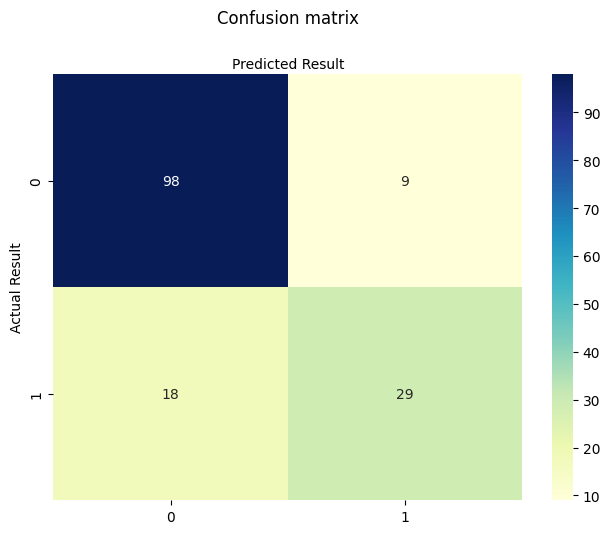

In [ ]:
# Visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
# Confusion matrix is visualized using Heatmap.
import seaborn as sns
class_names = ["Negative Cases","Positive Cases"] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap is created
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')